In [137]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

In [136]:
DOR = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/All_bound_M.xlsx", sheet_name = "DOR")
CDR = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/All_bound_M.xlsx", sheet_name = "CDR")
DDR = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/All_bound_M.xlsx", sheet_name = "DDR")

In [138]:
DOR['Res2'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [139]:
DOR['Res1'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [140]:
CDR['Res2'].apply(type).unique()

array([<class 'int'>, <class 'str'>, <class 'float'>], dtype=object)

In [141]:
CDR['Res1'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [142]:
CDR['PdbID'].apply(type).unique()

array([<class 'str'>, <class 'int'>], dtype=object)

## cleaning DOR:

In [143]:
index = DOR.loc[DOR['PdbID'] == 'PdbID'].index
DOR.drop(index, inplace = True)
DOR.reset_index().head(5)

,index,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,0,1ARG,5,7,A,A,3.304,0.057,M,E,-1.267,-1.571,0.444,-0.685,long,neutral
1,1,1ARG,5,8,A,A,3.304,0,M,N,-1.291,-1.571,0.444,-0.631,long,neutral
2,2,1ARG,5,9,A,A,3.304,3.957,M,I,-2.553,-1.571,0.444,2.21,long,minimally
3,3,1ARG,5,119,A,B,3.304,0.398,M,L,-2.395,-1.571,0.444,1.856,long,minimally
4,4,1ARG,5,123,A,B,3.304,0.999,M,T,-1.739,-1.571,0.444,0.378,short,neutral


## cleaning CDR:

In [144]:
index = CDR.loc[CDR['PdbID'] == 'PdbID'].index
CDR.drop(index, inplace = True)
CDR.reset_index().head(5)

,index,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,0,1A2W,1,3,A,A,0,0,K,T,-0.624,-1.525,0.429,-2.098,short,highly
1,1,1A2W,1,6,A,A,0,0,K,A,-0.989,-1.525,0.429,-1.248,water-mediated,highly
2,2,1A2W,2,4,A,A,0,0.437,E,A,-1.213,-1.525,0.429,-0.727,water-mediated,neutral
3,3,1A2W,2,5,A,A,0,1.93,E,A,-1.238,-1.525,0.429,-0.668,water-mediated,neutral
4,4,1A2W,2,6,A,A,0,0,E,A,-0.564,-1.525,0.429,-2.237,short,highly


## Working with DOR:

In [9]:
plist = DOR['PdbID'].unique()  # this is the protein list we have in the sheet DOR.
plist

array(['1ARG', '1ASM', '1AVP', '1B6C', '1BHM', '1BKD', '1CWQ', '1D2I',
       '1EPL', '1F34', '1F5Q', '1FJG', '1G4U', '1G64', '1GP2', '1H03',
       '1H3I', '1HN4', '1HYG', '1II6', '1IMA', '1IPS', '1IXY', '1J7V',
       '1K90', '1MK2', '1NVQ', '1O87', '1OW3', '1P7L', '1QJS', '1T8L',
       '1U1K', '1UJW', '1UZJ', '1VG9', '2AXT', '2CKD', '2EWN', '2H42',
       '2IKO', '2J6H', '2P0J', '2PAV', '2Q10', '2R56', '2Y48', '3AEV',
       '3AGZ', '3BUK', '3DG7', '3DS9', '3GLM', '3KTQ', '3NGS', '3OU6',
       '3PQC', '3V6R', '4E7Z', '4EI7', '4FG9', '4FOU', '4H3B', '4HBM',
       '4HOR', '4PBY', '4PSW', '4QRA', '4TYH', '4XJ0', '4Z2M', '5ACV',
       '5E5R', '5ETA', '5JIU', '5LI6', '5TB5', '5VN7'], dtype=object)

## Protein 1ARG:


### Frustration index : 
In the context of the frustration index for amino acids, negative and positive indexes refer to the different types of amino acid interactions and their associated energetic preferences.

Negative indexes indicate favorable or stabilizing interactions between amino acids. These interactions typically involve complementary shapes, favorable electrostatic interactions, and hydrogen bonding. Negative indexes suggest that the amino acid interactions contribute to the stability and proper folding of the protein structure.

Positive indexes, on the other hand, indicate unfavorable or destabilizing interactions between amino acids. These interactions can arise from steric clashes, repulsive electrostatic interactions, or strained conformations. Positive indexes suggest that the amino acid interactions introduce frustration or energetic dissatisfaction within the protein structure.

By considering both negative and positive indexes, researchers can assess the overall balance between stabilizing and destabilizing interactions in a protein. This information can provide insights into the folding dynamics, stability, and functional properties of the protein.



In [38]:
#zero is the dataset for protein 1ARG, zero means 0th index in plist.
zero = DOR[DOR['PdbID'] == plist[0]]
warnings.filterwarnings("ignore", category=FutureWarning)
MFmat = zero.groupby(["AA1","AA2"]).mean()['FrstIndex'].unstack().replace(np.nan, 0)
MFmat.head(3)

#zero.groupby(["AA1","AA2"]).mean()['FrstIndex'].replace(np.nan, 0)

AA2,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AA1,,,,,,,,,,,,,,,,,,,,
A,0.460108,1.309417,-0.577625,-0.811647,0.781486,0.116286,-0.474667,0.648069,0.294333,1.064714,0.789529,-0.376667,-0.313636,-0.3688,-0.045483,0.188500,0.287129,1.325615,-0.041125,0.683846
C,0.645313,0.000000,-0.457375,-1.050667,1.754300,0.401062,-1.069000,1.157000,0.484500,0.485500,2.067000,0.256000,0.192500,1.1570,0.066000,0.837000,0.691000,1.723250,0.000000,1.089500
D,-0.514875,0.251500,-0.365125,-1.466286,-0.994583,0.428667,-0.152000,-0.682867,0.810364,-0.244667,-0.209625,0.301000,0.113100,0.0290,0.878905,0.140667,-0.188167,-0.154429,-0.483000,-0.028667


#### we plotted the mean of frustration index for each connection in this protein.

*note: Here zero for frustration mean they didn't have any connection*

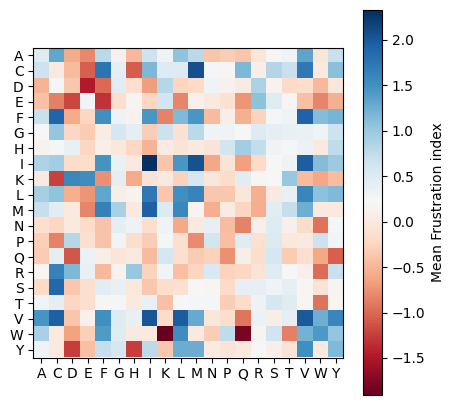

In [39]:
fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(5, 5)

labels = MFmat.index.to_list()
image = axes_cor.imshow(MFmat, cmap = plt.cm.RdBu)
plt.colorbar(image).set_label('Mean Frustration index')
axes_cor.set_xticks(np.arange(0,len(labels), 1))
axes_cor.set_yticks(np.arange(0,len(labels), 1))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
plt.draw()

#negeative contacts, the most read ones, are more stable.

#### we plotted the variance of frustration index for each connection, since we are not sure whether these contacts are favourable in general in this protein or they are favourable in just one location of the chain.

In [40]:
VFmat = zero.groupby(["AA1","AA2"]).var()['FrstIndex'].unstack().replace(np.nan, 0)
VFmat.head(3)

AA2,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AA1,,,,,,,,,,,,,,,,,,,,
A,0.619636,4.499379e-01,0.595245,0.529394,0.267018,0.269675,0.923511,1.762245,0.230484,1.245095,0.129077,0.779147,0.184497,0.661900,0.470794,0.254105,0.146838,0.468993,1.213564,0.024483
C,0.331537,0.000000e+00,0.072385,0.506850,0.149815,0.630821,0.000000,0.234641,0.000025,1.116791,0.007610,0.071965,0.000025,0.129541,0.000000,0.135200,0.063111,0.086140,0.000000,0.886732
D,0.685910,5.000000e-07,1.064264,2.791396,1.208075,0.578191,0.000032,1.302646,0.840419,0.966600,0.206121,1.042631,2.108661,2.688265,1.139178,0.288959,0.568374,0.568372,0.770950,0.084842


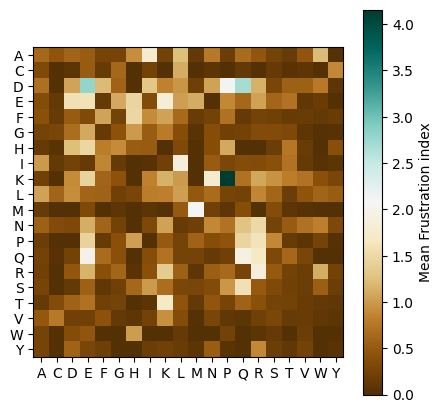

In [41]:
#zero here means no connection again

fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(5, 5)

labels = VFmat.index.to_list()
image = axes_cor.imshow(VFmat, cmap = plt.cm.BrBG)
plt.colorbar(image).set_label('Mean Frustration index')
axes_cor.set_xticks(np.arange(0,len(labels), 1))
axes_cor.set_yticks(np.arange(0,len(labels), 1))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
plt.draw()

In [14]:
#d =zero[(zero['AA1']== 'M') & (zero['AA2']== 'E')]
#d['FrstIndex'].var()

In [15]:
#zero.groupby(['Res2']).count()['ChainRes1'].unstack()

In [16]:
#zero.groupby(["Res1","ChainRes1","ChainRes2" ]).count()["Res2"].unstack()

In [17]:
#zero[zero['Res1'] == res1[0]]

#### Let's do the same thing for all proteins in the DOR file:

In [103]:
plist[0]

'1ARG'

In [19]:
mapper = map(lambda protein : DOR[DOR['PdbID'] == protein].reset_index(drop= True), plist)
maplist = list(mapper)
maplist[2].head(3)


,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,1AVP,1,3,A,A,0,2.133,M,S,-1.076,-1.571,0.437,-1.133,short,highly
1,1AVP,1,4,A,A,0,2.94,M,S,-1.365,-1.571,0.437,-0.472,long,neutral
2,1AVP,1,5,A,A,0,0,M,E,-0.123,-1.571,0.437,-3.31,short,highly


In [20]:
ghghv = map(lambda ProDF: ProDF.groupby(["AA1","AA2"]).mean()['FrstIndex'].unstack().replace(np.nan, 0), maplist)
ghghv = list(ghghv)
ghghv[0].head(4)


AA2,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AA1,,,,,,,,,,,,,,,,,,,,
A,0.460108,1.309417,-0.577625,-0.811647,0.781486,0.116286,-0.474667,0.648069,0.294333,1.064714,0.789529,-0.376667,-0.313636,-0.3688,-0.045483,0.188500,0.287129,1.325615,-0.041125,0.683846
C,0.645313,0.000000,-0.457375,-1.050667,1.754300,0.401062,-1.069000,1.157000,0.484500,0.485500,2.067000,0.256000,0.192500,1.1570,0.066000,0.837000,0.691000,1.723250,0.000000,1.089500
D,-0.514875,0.251500,-0.365125,-1.466286,-0.994583,0.428667,-0.152000,-0.682867,0.810364,-0.244667,-0.209625,0.301000,0.113100,0.0290,0.878905,0.140667,-0.188167,-0.154429,-0.483000,-0.028667
E,-0.413194,-0.848667,-1.204364,0.268077,-1.313000,-0.141667,0.159250,-0.233375,0.597100,-0.822350,0.115500,0.000000,-0.115000,-0.7190,1.087267,0.469308,0.184300,-0.427692,-0.829500,-0.543500


In [115]:
def MF_creator(DF, folder):
        plist = DF['PdbID'].unique()
        pmapper = map(lambda protein : DF[DF['PdbID'] == protein].reset_index(drop= True), plist)
        pmaplist = list(pmapper)
        #Mean Frustration matrix
        Mmatmapper = map(lambda ProDF: ProDF.groupby(["AA1","AA2"]).mean()['FrstIndex'].unstack().replace(np.nan, 0), pmaplist)
        MFlist = list(Mmatmapper)
        #matrix haro dri, alan mogheye imshow keshidan hastesh
        #pimage = map(lambda MFmat : axes_cor.imshow(MFmat, cmap = plt.cm.RdBu), MFlist)
        #images = list(pimage)
        #map(lambda image : plt.colorbar(image).set_label('Mean Frustration index'), pimage)
        
        i = 0
        for mat in MFlist:
            
                fig_cor, axes_cor = plt.subplots(1,1)
                fig_cor.set_size_inches(5, 5)

                labels = mat.index.to_list()
                image = axes_cor.imshow(mat, cmap = plt.cm.RdBu)
                plt.colorbar(image).set_label('Mean Frustration index')
                axes_cor.set_xticks(np.arange(0,len(labels), 1))
                axes_cor.set_yticks(np.arange(0,len(labels), 1))

                axes_cor.set_xticklabels(labels)
                axes_cor.set_yticklabels(labels)
                plt.savefig(folder+'/'+ plist[i]+'.png')
                plt.close()
                i = i + 1
        

        
        
        
        
        
        
       

In [146]:
plist = CDR['PdbID'].unique()
plist

array(['1A2W', '1BIL', '1BZY', '1F5Q', '1G4K', '1G64', '1GL1', '1HPU',
       '1HZX', '1I7W', '1IJJ', 44927, '1K2P', '1M1E', '1M4H', '1NVQ',
       '1PKH', '1PYG', '1Q4K', '1Q5Y', '1SVW', '1U76', '1UDU', '1UL1',
       '1VGO', '2ATH', '2EPN', '2FL2', '2IFW', '2JJB', '2OPZ', '2P0J',
       '2PS1', '2PZY', '2V5H', '2W97', '2XU7', '2Z8V', '2Z8W', '3A73',
       '3AGD', '3BQB', '3CJQ', '3CNZ', '3CW2', '3ES7', '3EXS', '3FHI',
       '3GCM', '3M1F', '3MHY', '3N9W', '3NGS', '3O08', '3R2B', '3SND',
       '3TCJ', '3V6R', '3VYS', '3ZN5', '4BUR', '4C3P', '4EB4', '4FG8',
       '4GM9', '4JSE', '4L1B', '4MCB', '4NDN', '4NJZ', '4PBY', '4U8H',
       '5DDT', '5GJM', '5L0D', '5LIE', '5MSR', '5MST', '5MT6', '5XFP'],
      dtype=object)

In [113]:
MF_creator(DOR, 'imDOR')

### Working with CDR:

In [148]:
MF_creator(CDR, 'imCDR') ###what is protein 44927??

---
ALL BOUND